<a href="https://colab.research.google.com/github/AthulKrishnaGirish/Internship-Project/blob/main/Stockanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance prophet tensorflow

In [ ]:
import yfinance as yf

# Download past 5 years of Apple stock
data = yf.download("AAPL", start="2019-01-01", end="2025-05-31")
data = data[['Close']]
data.dropna(inplace=True)
data.head()


/tmp/ipython-input-1-660454024.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2019-01-01", end="2025-05-31")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2019-01-02,37.617840
2019-01-03,33.870838
2019-01-04,35.316753
2019-01-07,35.238144
2019-01-08,35.909901


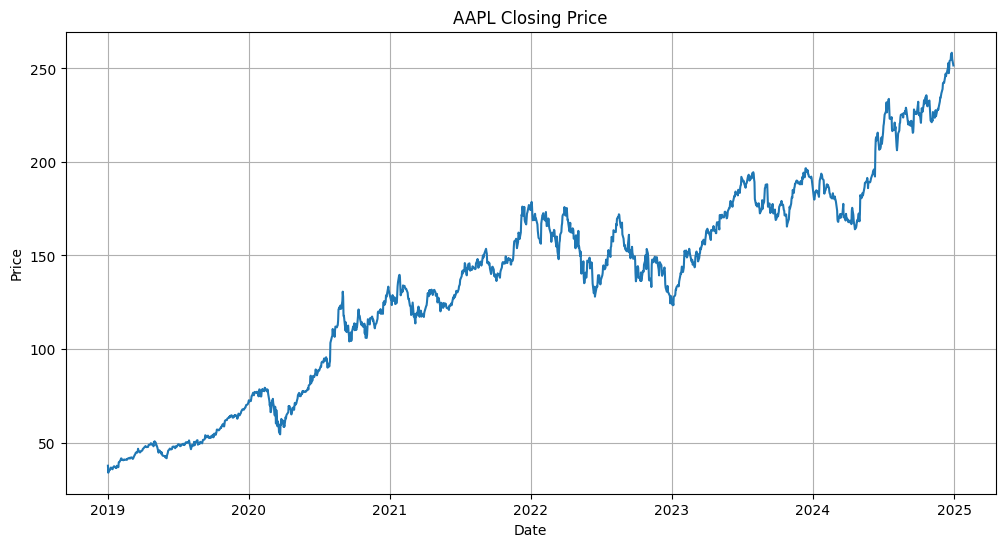

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

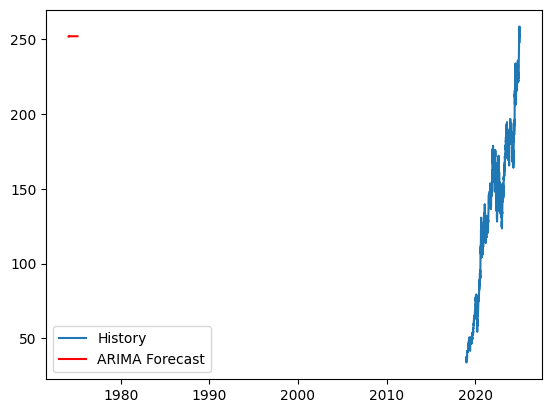

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Close'], order=(5,1,0))  # p,d,q
model_fit = model.fit()
forecast = model_fit.forecast(steps=365)

# Plot
plt.plot(data['Close'], label="History")
plt.plot(forecast.index, forecast, label="ARIMA Forecast", color='red')
plt.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxz99eclr/hg3av62r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxz99eclr/e15y3k6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=986', 'data', 'file=/tmp/tmpxz99eclr/hg3av62r.json', 'init=/tmp/tmpxz99eclr/e15y3k6o.json', 'output', 'file=/tmp/tmpxz99eclr/prophet_modelmcevw515/prophet_model-20250715164940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:49:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


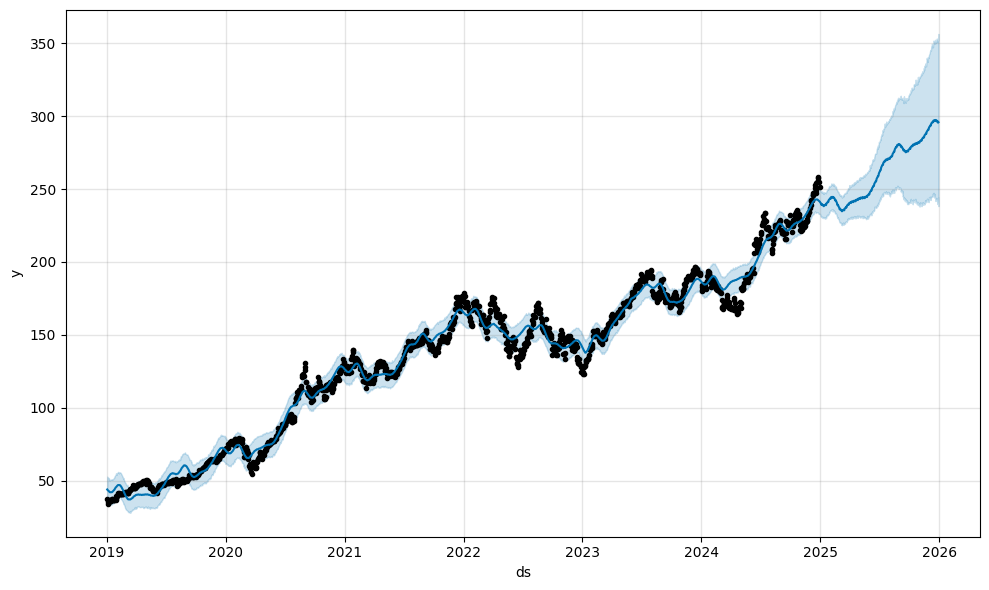

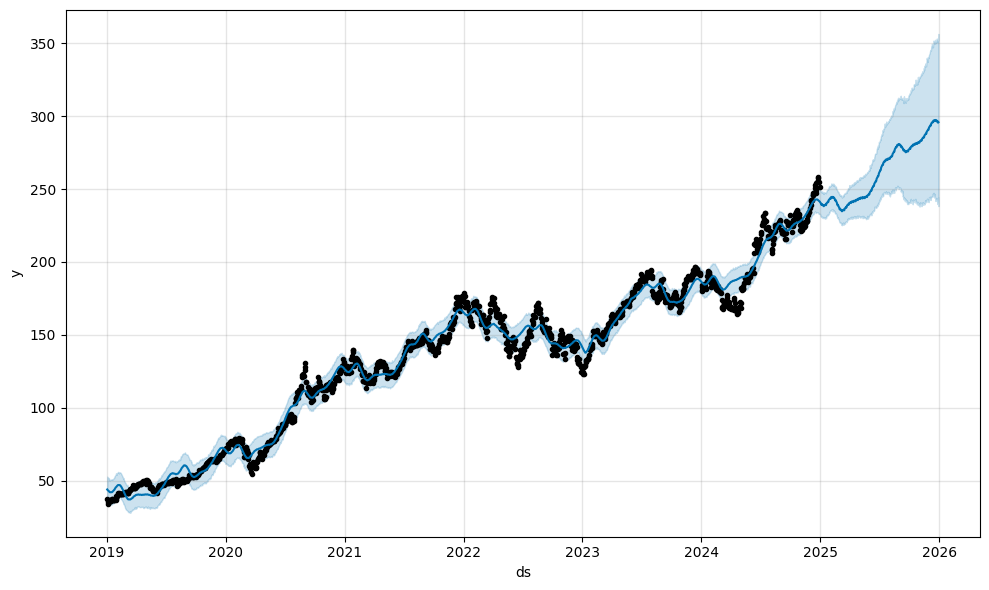

In [ ]:
from prophet import Prophet
import pandas as pd

# data in Prophet format
df_prophet = data.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']  # Prophet needs columns: 'ds' for date, 'y' for target

# Instantiate and fit the model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# future dataframe and predict
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.0580
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0010
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.0928e-04
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.9280e-04
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 6.2859e-04


/tmp/ipython-input-57-3053004158.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fre

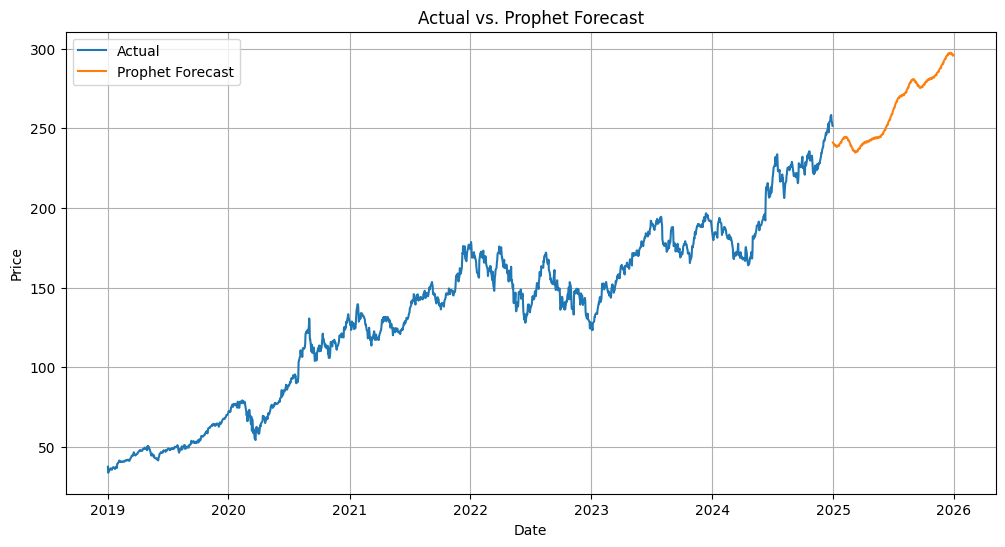

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import yfinance as yf

# Download past 5 years of Apple stock
data = yf.download("AAPL", start="2019-01-01", end="2024-12-31")
data = data[['Close']]
data.dropna(inplace=True)
# data.head()


# the last date from the historical data
last_date = data.index[-1]

# a date range for the ARIMA forecast starting from the day after the last historical date
arima_future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')

#  the ARIMA forecast
# Training the ARIMA model and get the fitted model
model = ARIMA(data['Close'], order=(5,1,0))  # p,d,q
model_fit = model.fit()

arima_forecast_values = model_fit.forecast(steps=365)

#  pandas Series for the ARIMA forecast with future dates as index
arima_forecast_series = pd.Series(arima_forecast_values.values, index=arima_future_dates)

# Prophet Model
# the data in Prophet format
df_prophet = data.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']  # Prophet needs columns: 'ds' for date, 'y' for target

# Instantiate and fit the model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# future dataframe and predict
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)


# Plot original data and Prophet forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Actual")

#  the index where the future forecast starts in the Prophet forecast DataFrame
prophet_future_start_index = forecast[forecast['ds'] > last_date].index[0]
plt.plot(forecast['ds'][prophet_future_start_index:].to_numpy(), forecast['yhat'][prophet_future_start_index:].to_numpy(), label='Prophet Forecast')

plt.title("Actual vs. Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()